# Lab 8: Define and Solve an ML Problem of Your Choosing

In [9]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [10]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I chose was book reviews.
2. I will be predicting whether a book review is positive or negative.
3. It is supervised learning that is also a binary classification problem where positive=1 and negative=0.
4. The main feature is the review text. Optionally, other meta data like ratings or reviewer info if available.
5. Sentiment analysis is valuable for publishers, retailers like Amazon, and authors to understand customer opinions and improve product offerings. A model that can automatically classify reviews helps businesses manage large volumes of feedback.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


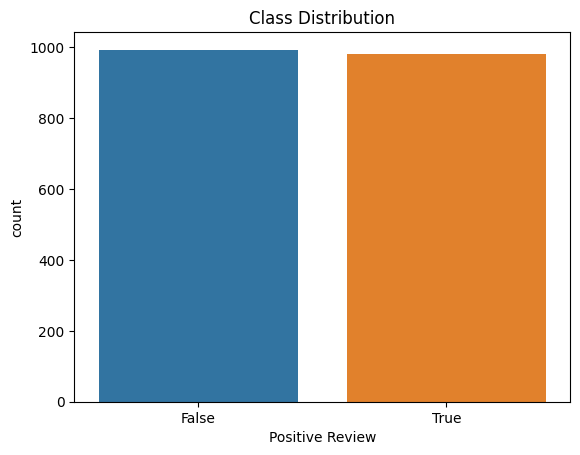

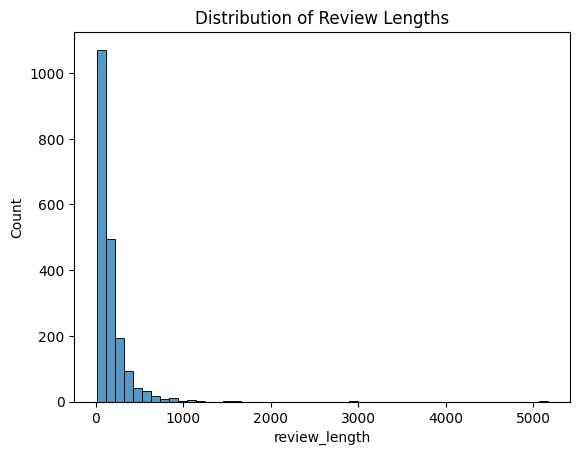

[('the', 16682),
 ('of', 9346),
 ('and', 8954),
 ('to', 8511),
 ('a', 7810),
 ('is', 5429),
 ('in', 5152),
 ('i', 5148),
 ('this', 4334),
 ('that', 3867)]

In [11]:
# Basic info
df.info()
df.head()

# Check class balance
df['Positive Review'].value_counts()
sns.countplot(x='Positive Review', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing text
df['Review'].isnull().sum()          # missing
(df['Review'].str.strip() == '').sum()  # empty strings

# Add review length for inspection
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()

# Plot review length distribution
from collections import Counter
all_words = ' '.join(df['Review']).lower().split()
Counter(all_words).most_common(10)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the dataset, I decided to keep the Review column as the primary feature because it contains the textual information needed to predict sentiment. I also created a review_length feature to capture the number of words in each review, which may provide additional signal to the model. No features were removed since the dataset only has two columns, and both are relevant.
2. To prepare the data, I will first convert the Positive Review label from Boolean to numeric values (1 for positive, 0 for negative). Next, I will clean the text by lowercasing, removing punctuation, and filtering out stopwords, since the most frequent words observed in the EDA were common stopwords. After cleaning, I will use TF-IDF vectorization to transform the review text into numerical features that capture the importance of words relative to their frequency.
3. The initial model I will use is Logistic Regression, as it is a strong baseline for text classification. I will also experiment with Multinomial Naive Bayes, which often performs well on text data, and Support Vector Machine (SVM), which can provide better performance on high-dimensional features generated by TF-IDF.
4. I plan to split the dataset into training (80%) and testing (20%) sets to evaluate generalization. The models will be trained on the TF-IDF-transformed features, and their performance will be analyzed using accuracy, precision, recall, and F1-score to ensure they handle both positive and negative reviews well. To improve performance, I will tune TF-IDF parameters such as max_features and ngram_range, compare different algorithms, and select the model with the best balance of metrics on the test set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
# Text processing and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model selection and training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load the dataset
df = pd.read_csv("data/bookReviewsData.csv")

# 2. Prepare the data
# Convert label to numeric
df['Positive Review'] = df['Positive Review'].astype(int)

# Extract features and labels
X = df['Review']
y = df['Positive Review']

# 3. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# -----------------------------
# Baseline Model: Logistic Regression
# -----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)
y_pred_log = log_model.predict(X_test_vec)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Model 2: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

print("\nNaive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Model 3: Support Vector Machine (SVM)
svm_model = LinearSVC(dual=False)
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

print("\nSVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Model Comparison
acc_log = accuracy_score(y_test, y_pred_log)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'penalty': ['l2'],                # L2 regularization
    'solver': ['lbfgs', 'liblinear']  # Solvers to test
}

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',          # Use F1-score for optimization
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_vec, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

# Evaluate optimized model
y_pred_grid = best_log_reg.predict(X_test_vec)
print("\nOptimized Logistic Regression Results:")
print(classification_report(y_test, y_pred_grid))

# Conclusion
# The model with the highest accuracy and best precision/recall/F1-score
# will be chosen as the final model.


Logistic Regression Results:
[[158  37]
 [ 35 165]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       195
           1       0.82      0.82      0.82       200

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395

Accuracy: 0.8177215189873418

Naive Bayes Results:
[[168  27]
 [ 49 151]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       195
           1       0.85      0.76      0.80       200

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395

Accuracy: 0.8075949367088607

SVM Results:
[[160  35]
 [ 36 164]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       195
           1       0.82      0.82      0.82  

### **Conclusion**
The results show that all three baseline models—Logistic Regression, Naive Bayes, and SVM—performed similarly, achieving accuracy scores around 81–82% with balanced precision, recall, and F1-scores for both classes. Naive Bayes had slightly higher recall for negative reviews but lower precision for positive reviews, while SVM achieved the highest overall accuracy at 82.03%. After applying GridSearchCV to optimize Logistic Regression, the best parameters identified were C=1, penalty='l2', and solver='liblinear'. The optimized Logistic Regression model achieved an accuracy of 82%, confirming that tuning helped match the performance of the SVM while maintaining balanced metrics. Overall, both the optimized Logistic Regression and SVM models generalize well, with SVM showing a slight edge in raw accuracy. Therefore, SVM can be considered the best-performing model, but the optimized Logistic Regression is equally strong and easier to interpret, making it a solid choice for deployment.
